In [303]:
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import keras
from keras import Sequential
from keras.models import Sequential
from keras.optimizers import SGD,Adam,Adagrad
from keras.layers import InputLayer, Dense 
%matplotlib inline

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# https://www.kaggle.com/aliounediop/randomforest-92-and-neuralnetwork-81


In [304]:
df=pd.read_csv('mushrooms.csv')

In [305]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [306]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [307]:
print("Mushrooms dataset dimensions : {}".format(df.shape))

Mushrooms dataset dimensions : (8124, 23)


In [308]:
df.groupby('class').size()

class
e    4208
p    3916
dtype: int64

In [309]:
# df = df.drop(columns = ['veil-type', 'bruises', 'veil-color', 'gill-attachment'])


In [310]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [311]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in df.columns:
    df[col] = Encoder_X.fit_transform(df[col])
# Encoder_y=LabelEncoder()
#replace numerical values: if the mushroom is poisonous, y = 1; if the mushroom is not poisonous, y = 0
# y = Encoder_y.fit_transform(y)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [312]:
#Plotting the variables using histogram
# df.hist(figsize=(30,20))

In [313]:
#Checking for missing values
# df.isna().sum()

In [314]:
#split dataset into features and label
X = df.drop(columns=['class'])
# X = X.drop(columns = ['veil-type'])
y = df['class']
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [315]:
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [316]:
 # 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#What is random_state?

In [317]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [318]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [319]:
X_train

array([[ 1.03022822,  0.13973799, -1.76668189, ..., -1.09445396,
         0.28013546,  2.03247825],
       [ 1.03022822, -1.48677212, -0.5885256 , ..., -0.67522295,
         1.07299272, -0.87398302],
       [ 1.03022822, -1.48677212, -0.5885256 , ..., -1.09445396,
         0.28013546, -0.87398302],
       ...,
       [-0.85091425,  0.95299304, -0.19580684, ..., -0.25599193,
         1.07299272,  1.45118599],
       [-0.22386676,  0.13973799, -0.98124436, ...,  1.42093215,
         0.28013546,  1.45118599],
       [-0.22386676, -1.48677212, -0.5885256 , ...,  1.42093215,
        -1.30557906, -0.29269077]])

In [320]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [321]:
X_train

array([[-0.37360406, -0.18738926],
       [-1.45745751, -1.52487599],
       [-1.49522728,  2.23523767],
       ...,
       [-2.65977928, -1.46750395],
       [ 2.80404337, -0.83539456],
       [ 0.95298026,  0.68157124]])

In [322]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [323]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))
        res = cross_val_score(classifier, X_train, y_train, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))

In [324]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier()
# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)

In [325]:
#Predict the response for test dataset
y_pred = classifier.predict(X_test)
# Model Accuracy, how often is the classifier correct?
DTAccuracy = metrics.accuracy_score(y_test, y_pred)
print("DT Test Accuracy:", DTAccuracy)

DT Test Accuracy: 0.9273995077932732


In [326]:
# pearson or spearman correlation???
#what am i doing?

# df1=df.corr('pearson')
# f, ax = plt.subplots(figsize=(11, 9))
# sns.heatmap(df1,center=0,square=True,annot=True,cmap="YlGnBu")

In [327]:
def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.6, cmap = ListedColormap(('#ff3f34', '#3c40c6')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('#ff3f34', '#3c40c6'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('#ff3f34', '#3c40c6')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('#ff3f34', '#3c40c6'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

In [328]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	0.9272

Standard Deviation:	0.0076


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


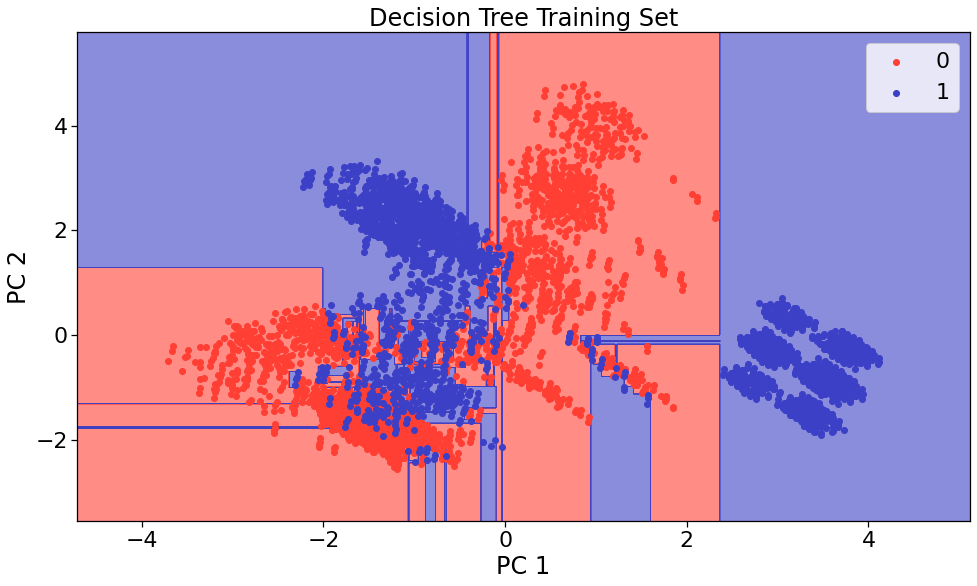

In [329]:
visualization_train('Decision Tree')

In [330]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9274

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1257
           1       0.93      0.92      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438


Confusion Matrix:
[[1169   88]
 [  89 1092]]

Average Accuracy:	0.9267

Standard Deviation:	0.0076


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


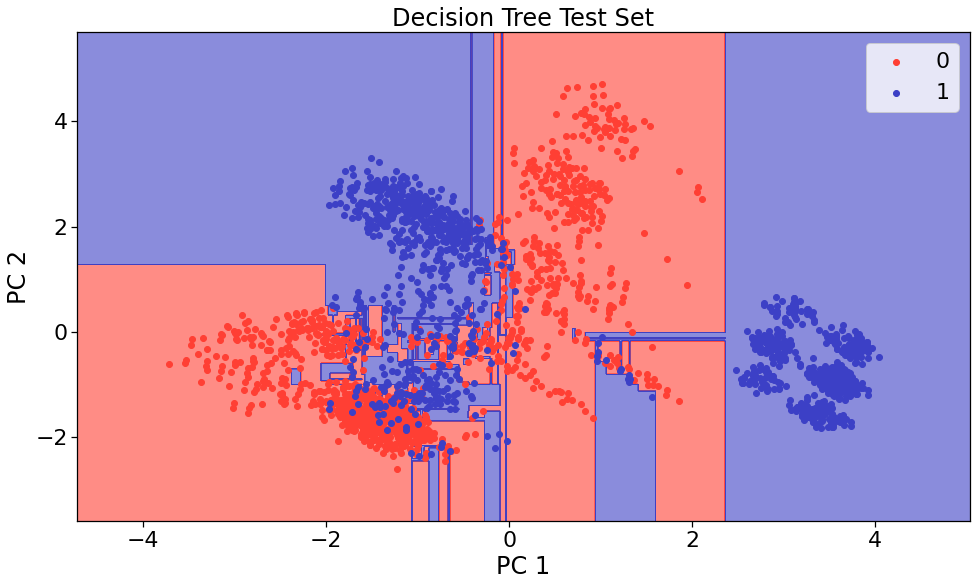

In [331]:
visualization_test('Decision Tree')

In [332]:
from sklearn.model_selection import learning_curve
# from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit

In [333]:
# train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='linear'), X, y, train_sizes=[0.6, 0.7, 0.8], cv=5)

In [334]:
# train_scores

In [335]:
# valid_scores

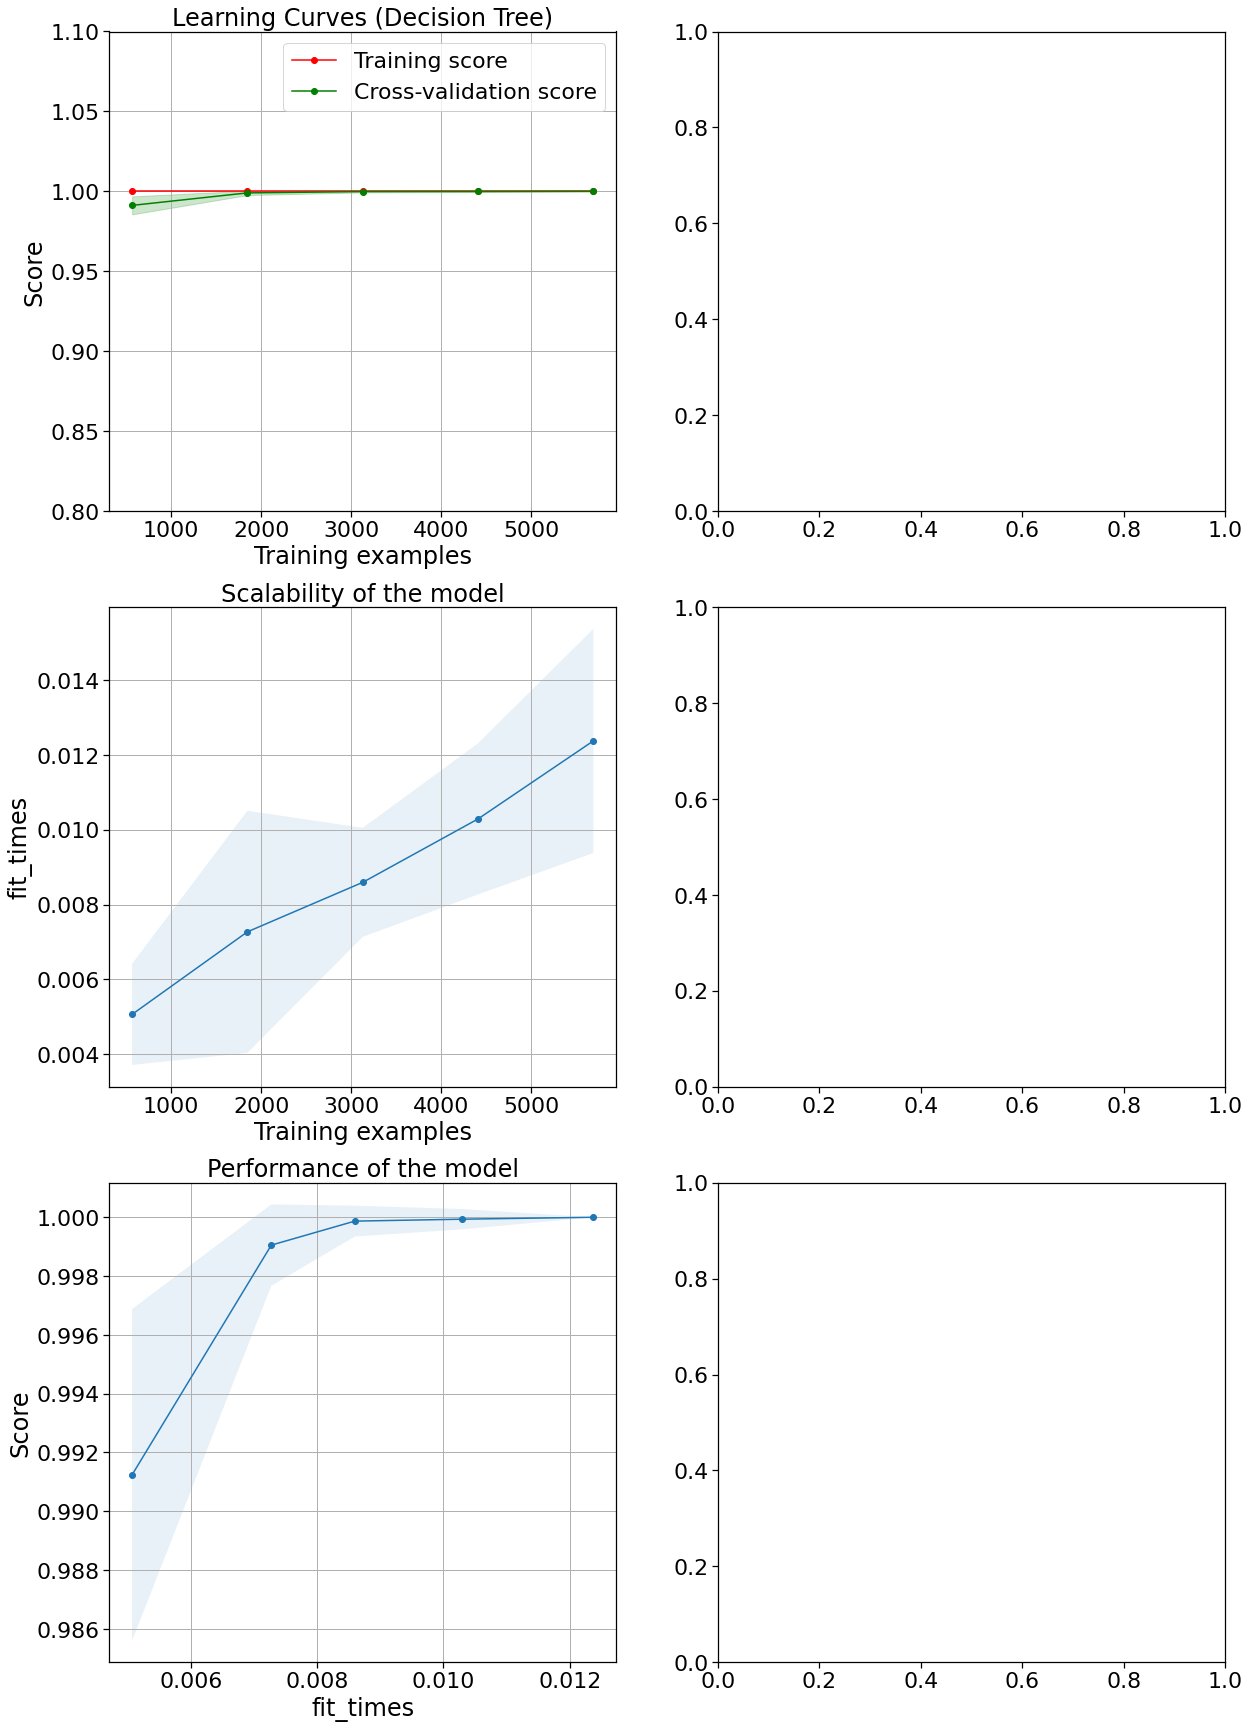

In [336]:

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 10))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    
    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    
    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(20, 30))

title = "Learning Curves (Decision Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=42)

estimator = classifier
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.8, 1.1),
                    cv=cv, n_jobs=4)
plt.show()

In [337]:
print(8124*0.7)

5686.799999999999


In [338]:
# Create Decision Tree classifer object with entropy
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9073010664479081


In [339]:
###NEURAL NETWORK MLP
#https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# X, y = make_classification(n_samples=100, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)


In [340]:
#Add classifier and fit the data
classifier = MLPClassifier(solver = 'sgd', hidden_layer_sizes=(100,),random_state=42, activation = 'logistic', max_iter=500)
classifier.fit(X_train, y_train)


MLPClassifier(activation='logistic', max_iter=500, random_state=42,
              solver='sgd')

In [341]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [342]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.6871

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      2951
           1       0.68      0.66      0.67      2735

    accuracy                           0.69      5686
   macro avg       0.69      0.69      0.69      5686
weighted avg       0.69      0.69      0.69      5686


Confusion Matrix:
[[2102  849]
 [ 930 1805]]

Average Accuracy:	0.6811

Standard Deviation:	0.0156


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


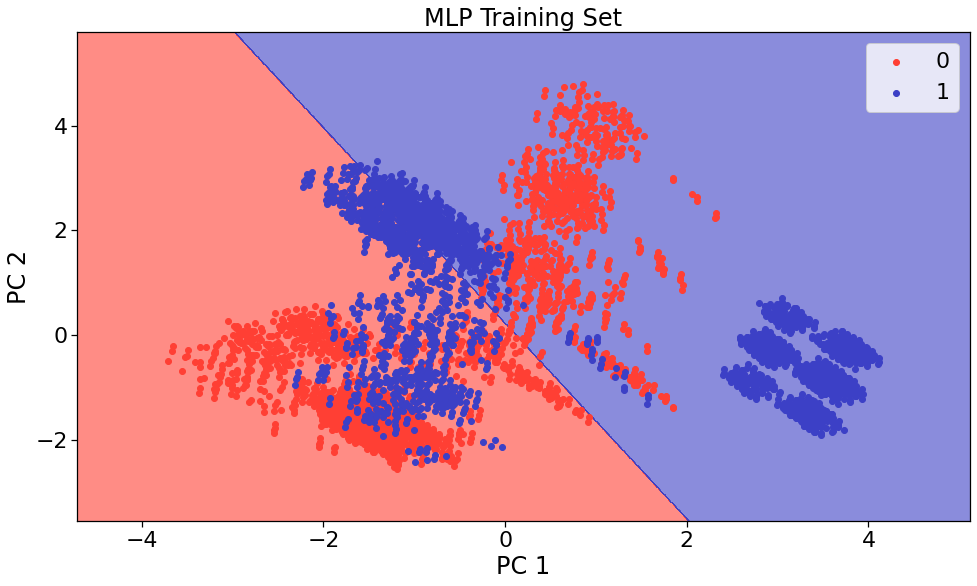

In [343]:
visualization_train('MLP')

In [344]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.6809

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1257
           1       0.68      0.65      0.66      1181

    accuracy                           0.68      2438
   macro avg       0.68      0.68      0.68      2438
weighted avg       0.68      0.68      0.68      2438


Confusion Matrix:
[[890 367]
 [411 770]]

Average Accuracy:	0.6811

Standard Deviation:	0.0156


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


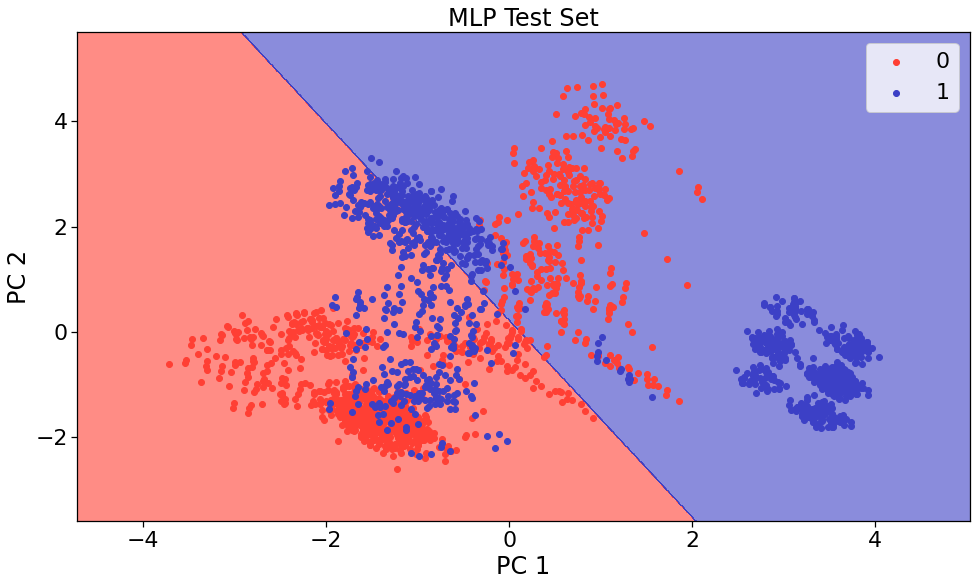

In [345]:
visualization_test('MLP')

In [346]:
#Predict the response for test dataset
y_pred = classifier.predict(X_test)
# Model Accuracy, how often is the classifier correct?
MLPAccuracy = metrics.accuracy_score(y_test, y_pred)
print("MPL Test Accuracy:", MLPAccuracy)

MPL Test Accuracy: 0.6808859721082855


In [347]:
# import warnings

# import matplotlib.pyplot as plt

# from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import MinMaxScaler
# from sklearn import datasets
# from sklearn.exceptions import ConvergenceWarning

# # different learning rate schedules and momentum parameters
# #adjust params! Why adam is always 1?
# # params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
# #            'learning_rate_init': 0.2},
# #           {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
# #            'nesterovs_momentum': False, 'learning_rate_init': 0.2},
# #           {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
# #            'nesterovs_momentum': True, 'learning_rate_init': 0.2},
# #           {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
# #            'learning_rate_init': 0.2},
# #           {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
# #            'nesterovs_momentum': True, 'learning_rate_init': 0.2},
# #           {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
# #            'nesterovs_momentum': False, 'learning_rate_init': 0.2},
# #           {'solver': 'adam', 'learning_rate_init': 0.01}]
# params = [{'solver': 'sgd', 'learning_rate': 'constant','activation': 'logistic', 'momentum': 0, 'hidden_layer_sizes':(8),
#            'learning_rate_init': 0.005},
#           {'solver': 'sgd', 'learning_rate': 'constant', 'activation': 'logistic', 'momentum': 0,'hidden_layer_sizes':(8),
#            'learning_rate_init': 0.008},
#           {'solver': 'sgd', 'learning_rate': 'constant','activation': 'logistic',  'momentum': 0,'hidden_layer_sizes':(8),
#            'learning_rate_init': 0.01},
#           {'solver': 'sgd', 'learning_rate': 'constant','activation': 'logistic',  'momentum': 0,'hidden_layer_sizes':(8),
#            'learning_rate_init': 0.05},
#           {'solver': 'sgd', 'learning_rate': 'constant','activation': 'logistic',  'momentum': 0,'hidden_layer_sizes':(8),
#            'learning_rate_init': 0.1}
#          ]

# labels = ["learning-rate 0.005 logistic", "learning-rate 0.008","learning-rate 0.01","learning-rate 0.05","learning-rate 0.1"
         
#          ]

# # The number of hidden layers
# # https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# plot_args = [{'c': 'red', 'linestyle': '-'},
#              {'c': 'green', 'linestyle': '-'},
# #              {'c': 'blue', 'linestyle': '-'},
# #              {'c': 'red', 'linestyle': '--'},
#              {'c': 'green', 'linestyle': '--'},
#              {'c': 'blue', 'linestyle': '--'},
#              {'c': 'black', 'linestyle': '-'}
#             ]




# def plot_on_dataset(X, y, ax, name):
#     # for each dataset, plot learning for each learning strategy
#     print("\nlearning on dataset %s" % name)
#     ax.set_title(name)

# #     X = MinMaxScaler().fit_transform(X)
# #fit_transform X or X test?  

#     mlps = []
# #     if name == "Outcome":
# #         # digits is larger but converges fairly quickly
# #         max_iter = 15
# #     else:
#     max_iter = 1000

#     for label, param in zip(labels, params):
#         print("training: %s" % label)
#         mlp = MLPClassifier(random_state=42,
#                             max_iter=max_iter, **param)

#         # some parameter combinations will not converge as can be seen on the
#         # plots so they are ignored here
# #         with warnings.catch_warnings():
# #             warnings.filterwarnings("ignore", category=ConvergenceWarning,
# #                                     module="sklearn")
#         mlp.fit(X_train, y_train)

#         mlps.append(mlp)
#         print("Training set score: %f" % mlp.score(X_test, y_test))
#         print("Training set loss: %f" % mlp.loss_)
#     for mlp, label, args in zip(mlps, labels, plot_args):
#         ax.plot(mlp.loss_curve_, label=label, **args)


# fig, axes = plt.subplots(8, 3, figsize=(30, 20))


# # load / generate some toy datasets
# # iris = datasets.load_iris()
# # X_digits, y_digits = datasets.load_digits(return_X_y=True)

# # data_sets = [(iris.data, iris.target),
# #              (X_digits, y_digits),
# #              datasets.make_circles(noise=0.2, factor=0.5, random_state=42),
# #              datasets.make_moons(noise=0.3, random_state=42)]

# for ax, data, name in zip(axes.ravel(), df, attributes):
#     plot_on_dataset(X, y, ax=ax, name=name)

# fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
# plt.show()

In [348]:
# scores=cross_val_score(model,X,y,cv=cv,verbose=0)
# score.mean()

In [349]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier as KNN
classifier = KNN()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [350]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9573

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2951
           1       0.97      0.94      0.95      2735

    accuracy                           0.96      5686
   macro avg       0.96      0.96      0.96      5686
weighted avg       0.96      0.96      0.96      5686


Confusion Matrix:
[[2877   74]
 [ 169 2566]]

Average Accuracy:	0.9446

Standard Deviation:	0.0059


In [351]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)


Test results:

Accuracy Score: 0.9446

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1257
           1       0.96      0.93      0.94      1181

    accuracy                           0.94      2438
   macro avg       0.95      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438


Confusion Matrix:
[[1207   50]
 [  85 1096]]

Average Accuracy:	0.9446

Standard Deviation:	0.0059


In [352]:
test_scores = []
train_scores = []

# how to determine the 15?
for i in range(1,20):

    knn = KNN(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [353]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [354]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 94.46267432321575 % and k = [5]


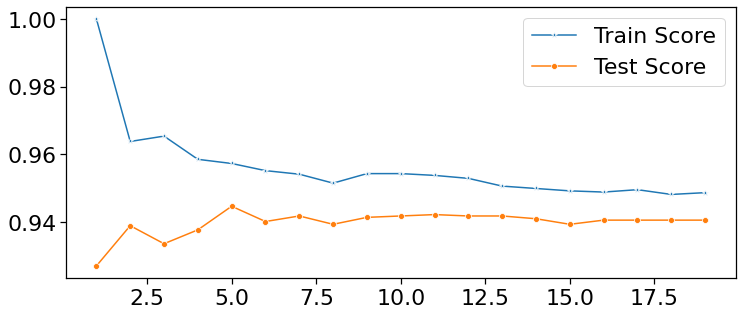

In [355]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

In [356]:
classifier = KNN(1)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
KNNAccuracy = metrics.accuracy_score(y_test, y_pred)

print("KNN Test Accuracy:", KNNAccuracy)

KNN Test Accuracy: 0.9269893355209188


In [357]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	0.9284

Standard Deviation:	0.0055


In [358]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9270

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1257
           1       0.92      0.93      0.92      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438


Confusion Matrix:
[[1167   90]
 [  88 1093]]

Average Accuracy:	0.9284

Standard Deviation:	0.0055


In [ ]:
visualization_train('K-NN')

In [ ]:
visualization_test('K-NN')


In [ ]:
# # ROC-AUC 
# # ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

# # Well Explained in this video: https://www.youtube.com/watch?v=OAl6eAyP-yo

# from sklearn.metrics import roc_curve
# y_pred_proba = knn.predict_proba(X_test)[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
# plt.plot([0,1],[0,1],'k--')
# plt.plot(fpr,tpr, label='Knn')
# plt.xlabel('fpr')
# plt.ylabel('tpr')
# plt.title('Knn(n_neighbors=3) ROC curve')
# plt.show()

In [ ]:
# #Area under ROC curve
# from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test,y_pred_proba)

In [ ]:
# #import GridSearchCV???????
# from sklearn.model_selection import GridSearchCV
# #In case of classifier like knn the parameter to be tuned is n_neighbors
# param_grid = {'n_neighbors':np.arange(1,50)}
# knn = KNeighborsClassifier()
# knn_cv= GridSearchCV(knn,param_grid,cv=5)
# knn_cv.fit(X,y)
# #???Grid search result is different from the 

# print("Best Score:" + str(knn_cv.best_score_))
# print("Best Parameters: " + str(knn_cv.best_params_))

In [ ]:
#Ensemble Learning - Boosting
# https://towardsdatascience.com/ensemble-learning-using-scikit-learn-85c4531ff86a

# https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

seed = 42
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
classifier = GradientBoostingClassifier(random_state=seed, learning_rate = 0.1)
results = model_selection.cross_val_score(classifier, X, y, cv=kfold)
print(results)

In [ ]:
print(results.mean())

In [ ]:
#SVC Classification Model
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42)

classifier.fit(X_train,y_train)

In [ ]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)


In [ ]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

In [ ]:
visualization_train('SVC')

In [ ]:
visualization_test('SVC')


In [ ]:
accuracy = []
deviation = []